## Heat Map
indicating laplacian of each point on the drum surface in the Fourier domain

In [1]:
import hitdifferentparts
import IPython.display as ipd
import numpy as np
import librosa
#import autograd
#import torch
#from kymatio import Scattering1D

#from torch.autograd import backward
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from tqdm import tnrange, tqdm_notebook

sample from 1/8 of the drum surface, resolution is 0.05

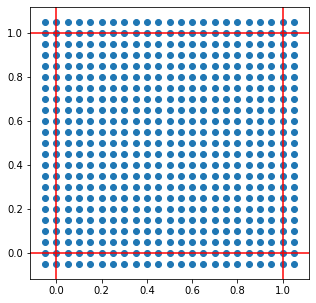

In [2]:
d = 1/20
x = np.linspace(0-d,1+d,21+2)
y = np.linspace(0-d,1+d,21+2)
x_sel = []
y_sel = []
for i in x:
    for j in y:
        x_sel.append(i)
        y_sel.append(j)
plt.figure(figsize=(5,5))
#Rectangle((0,0), 1, 1,linestyle='-')
plt.scatter(x_sel,y_sel)
plt.axvline(x=0,color = 'r')
plt.axvline(x=1,color = 'r')
plt.axhline(y=0,color = 'r')
plt.axhline(y=1,color = 'r')
plt.show()
#plt.xlim([0,1])
#plt.ylim([0,1])

dictionary that forms mapping between points that are equivalent to each other.

scattering transform on each point in the set

matrix of scattering transfrom of the entire surface

and then get matrix of laplacian of each point

make coordinate mapping dictionary

In [3]:
x1 = [round(i,2) for i in x]
y1 = [round(i,2) for i in y]

In [4]:
coord_set = {}
# (0.1,0.9) = (0.9,0.1) = {0.9,0.9} = {0.1,0.1}
tot = 0
for i in x1[1:-1]:
    for j in y1[1:-1]:
        tot+=1
        tempset = {(i,j),(round(1-i,2),round(1-j,2)),(round(1-i,2),j),(i,round(1-j,2)),(j,i),(round(1-j,2),round(1-i,2)),(j,round(1-i,2)),(round(1-j,2),i)}
        count = 0
        for coord in tempset:
            if coord not in coord_set.keys():
                count += 1
        if count == len(tempset):
            coord_set[coord] = list(tempset)
print(coord_set.keys(),len(coord_set.keys()))
        

dict_keys([(1.0, 1.0), (1.0, 0.05), (1.0, 0.9), (1.0, 0.85), (1.0, 0.8), (1.0, 0.25), (1.0, 0.7), (1.0, 0.35), (1.0, 0.4), (1.0, 0.55), (0.5, 0.0), (0.95, 0.95), (0.9, 0.05), (0.85, 0.05), (0.8, 0.05), (0.75, 0.05), (0.7, 0.05), (0.65, 0.05), (0.6, 0.05), (0.55, 0.05), (0.95, 0.5), (0.9, 0.9), (0.85, 0.1), (0.8, 0.1), (0.75, 0.1), (0.7, 0.1), (0.65, 0.1), (0.6, 0.1), (0.55, 0.1), (0.9, 0.5), (0.85, 0.85), (0.8, 0.15), (0.75, 0.15), (0.7, 0.15), (0.65, 0.15), (0.6, 0.15), (0.55, 0.15), (0.85, 0.5), (0.8, 0.8), (0.75, 0.2), (0.7, 0.2), (0.65, 0.2), (0.6, 0.2), (0.55, 0.2), (0.8, 0.5), (0.75, 0.75), (0.7, 0.25), (0.65, 0.25), (0.6, 0.25), (0.55, 0.25), (0.75, 0.5), (0.7, 0.7), (0.65, 0.3), (0.6, 0.3), (0.55, 0.3), (0.7, 0.5), (0.65, 0.35), (0.6, 0.35), (0.55, 0.35), (0.65, 0.5), (0.6, 0.4), (0.55, 0.4), (0.6, 0.5), (0.55, 0.55), (0.55, 0.5), (0.5, 0.5)]) 66


make the sound sets

In [12]:
w,t,pp,d,a = [3960.1349876368563, 0.09376144165196816, 0.0016713390753826927,
       0.0012821611585344935, 0.23768976773282824]
sounds_set = {}
for key in coord_set.keys():
    #y = hitdifferentparts.getsounds_imp_gaus(10,10,key[0],key[1],w,t,pp,d,a,22050) #gaussian excitation
    y = hitdifferentparts.hitdiffparts(key[0],key[1],w,t,pp,d,a) #delta excitation
    if np.isnan(max(y)) == True:
        y = np.zeros(len(y))
    sounds_set[key] = y

/Users/lilyh/Documents/NYU/THESIS/wave2shape/notebooks/hitdifferentparts.py:67: RuntimeWarning: invalid value encountered in true_divide
  y2 = y/np.max(np.abs(np.array(y)))


--- 1.0056021213531494 seconds ---
--- 1.1806509494781494 seconds ---
--- 1.0658528804779053 seconds ---
--- 1.156559944152832 seconds ---
--- 1.0249340534210205 seconds ---
--- 1.0584039688110352 seconds ---
--- 1.066312313079834 seconds ---
--- 0.9324169158935547 seconds ---
--- 1.1012330055236816 seconds ---
--- 0.9279689788818359 seconds ---
--- 1.0879638195037842 seconds ---
--- 1.015429973602295 seconds ---
--- 0.978644847869873 seconds ---
--- 1.2041139602661133 seconds ---
--- 0.9527530670166016 seconds ---
--- 0.9690370559692383 seconds ---
--- 1.0527591705322266 seconds ---
--- 1.0803191661834717 seconds ---
--- 1.0302939414978027 seconds ---
--- 0.9452860355377197 seconds ---
--- 0.9790921211242676 seconds ---
--- 0.9733140468597412 seconds ---
--- 0.9053940773010254 seconds ---
--- 0.891726016998291 seconds ---
--- 0.8991198539733887 seconds ---
--- 0.8948240280151367 seconds ---
--- 0.9030096530914307 seconds ---
--- 1.2057268619537354 seconds ---
--- 1.3809568881988525 se

make fourier sets

In [6]:
def getfourier(y):
    """
    this function outputs scattering transform of a time-domain signal.
    """
    N = len(y)
    Fy = np.abs(np.fft.fft(y))
    return Fy

In [13]:
fourier_set = {}
for key in sounds_set.keys():
    y = sounds_set[key]
    Fy = getfourier(y)
    fourier_set[key] = Fy

In [14]:
nully = np.zeros(len(y))
fourier_set['null'] = getfourier(nully)

get laplacian of the entire surface

In [15]:
def get_fourier(i,j):
    #get scattering coefficients from coordinate
    coordset = {(i,j),(round(1-i,2),round(1-j,2)),(round(1-i,2),j),
                (i,round(1-j,2)),(j,i),(round(1-j,2),round(1-i,2)),
                (j,round(1-i,2)),(round(1-j,2),i)}
    count = 0
    for c in coordset:
        if c in fourier_set.keys():
            break
        elif c not in fourier_set.keys():
            count += 1
    if count == len(coordset):
        c = 'null'
    
    return fourier_set[c]

In [57]:
f = get_fourier(0.5,0.2)
print(f.shape,np.linalg.norm(f),np.linalg.norm(np.mean(f)),np.linalg.norm(np.sum(f)))

(65536,) 3254.5647752647496 1.1188630228279524e-16 7.332580706405269e-12


## ???Do I calculate norm of laplacian here or sum of laplacian vector

1. x1 is from -0.05 to 1.05
2. x1[1:-1] is 0 to 1
3. laplacian should be 21 by 21
4. but we want to abandon the boundary since it's setting the bar too high
5. so we do x1[2:-2]


In [16]:
Lap_sum = np.zeros((len(x1[1:-1]),len(y1[1:-1])))
Lap_norm = np.zeros((len(x1[1:-1]),len(y1[1:-1])))
Lap_mean = np.zeros((len(x1[1:-1]),len(y1[1:-1])))
d = 0.05
for i,x in enumerate(x1[2:-2]):
    for j,y in enumerate(y1[2:-2]):
        lap = get_fourier(x,y) - 0.25 * (get_fourier(round(x+d,2),y)+get_fourier(round(x-d,2),y)
                           +get_fourier(x,round(y+d,2))+get_fourier(x,round(y-d,2))) 
        #print(x,y,i,j)
        lap = lap/np.linalg.norm(get_fourier(x,y))
        Lap_sum[i+1,j+1] = np.linalg.norm(np.sum(lap))
        Lap_norm[i+1,j+1] = np.linalg.norm(lap)
        Lap_mean[i+1,j+1] = np.linalg.norm(np.mean(lap))

In [18]:
np.max(Lap_norm)

0.5170053089528444

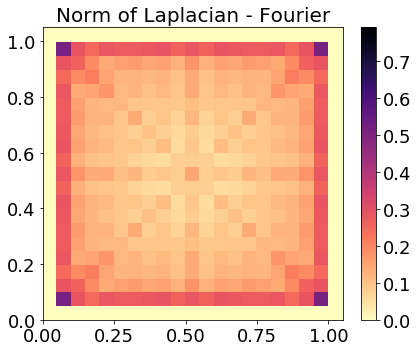

In [19]:
#setting boundary to zero
fig,ax = plt.subplots()
fig.set_size_inches(6, 5)
ax.tick_params(labelsize=18)
c = ax.pcolormesh(x1[1:], y1[1:], Lap_norm, cmap='magma_r', vmin=np.min(Lap_norm), vmax=0.79)
plt.title('Norm of Laplacian - Fourier',fontsize=20)
fig.tight_layout()
cb=fig.colorbar(c, ax=ax)
cb.ax.tick_params(labelsize=18)
plt.show()

#magma_r uses less ink on the poster
#bugfix the crop boundaries
# compare with scattering
# maybe give actual values in the poster.
# comment on the order of magnitude of error

In [16]:
np.max(Lap_norm)

0.790287494666335

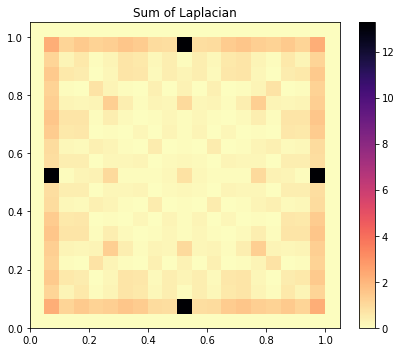

In [168]:
fig,ax = plt.subplots()
fig.set_size_inches(6, 5)
c = ax.pcolormesh(x1[1:], y1[1:], Lap_sum, cmap='magma_r', vmin=np.min(Lap_sum), vmax=np.max(Lap_sum))
plt.title('Sum of Laplacian')
fig.tight_layout()
fig.colorbar(c, ax=ax)
plt.show()

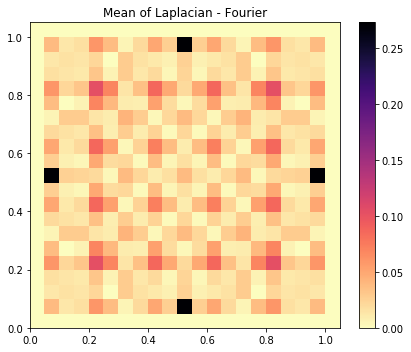

In [144]:
fig,ax = plt.subplots()
fig.set_size_inches(6, 5)
c = ax.pcolormesh(x1[1:], y1[1:], Lap_mean, cmap='magma_r', vmin=np.min(Lap_mean), vmax=np.max(Lap_mean))
plt.title('Mean of Laplacian - Fourier')
fig.tight_layout()
fig.colorbar(c, ax=ax)
plt.show()

In [145]:
print(np.max(Lap_mean))

0.27302978431196967
